In [4]:
import pandas as pd

df1 = pd.read_csv("../../dataset_raw/HSC/label.csv")
df2 = pd.read_csv("../../dataset_raw/HSC_TNG50/label.csv")

In [5]:
quant1 = df1[["photoz", "i_cmodel_mag_ge"]]
quant2 = df2[['z', 'i_band_mag_apparent']]

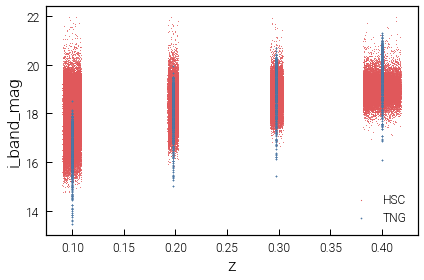

In [6]:
import matplotlib.pyplot as plt
plt.scatter(quant1["photoz"], quant1["i_cmodel_mag_ge"], s=1, label="HSC")
plt.scatter(quant2["z"], quant2["i_band_mag_apparent"], s=2, label="TNG")
plt.xlabel("z")
plt.ylabel("i_band_mag")
plt.legend()

KeyError: 'i_band_mag_dust_apparent'

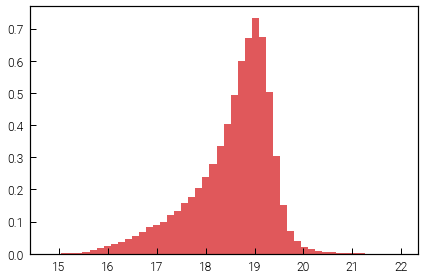

In [7]:
bins = 50
plt.hist(quant1["i_cmodel_mag_ge"], density=True, label="HSC", bins=bins)
plt.hist(quant2["i_band_mag_dust_apparent"], density=True, alpha=0.5, label="TNG", bins=bins)
plt.xlabel("i_band_mag")
plt.legend()

In [207]:
from sklearn.neighbors import KDTree
kdt = KDTree(quant1, metric='euclidean')

In [208]:
import numpy as np

index_set = set()
final = []

MAX_TRYS = 20
Max_DISTANCE = 0.05

for x in quant2.to_numpy():
    for i in range(MAX_TRYS): 
        i += 1
        distance, index = kdt.query([x], k=i, return_distance=True)
        distance = distance[0,-1]
        index = index[0,-1]
        if index not in index_set or distance>Max_DISTANCE:
            break            
            
    index_set.add(index)
    final.append(index)

ux, counts = np.unique(final, return_counts=True)
print(np.sum(counts > 1))


256


In [209]:
df1_matched = df1.iloc[final]
quant1 = df1_matched[["photoz", "i_cmodel_mag_ge"]]

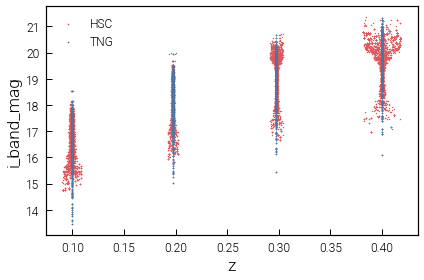

In [210]:
import matplotlib.pyplot as plt
plt.scatter(quant1["photoz"], quant1["i_cmodel_mag_ge"], s=2, label="HSC")
plt.scatter(quant2["z"], quant2["i_band_mag_apparent"], s=2, label="TNG")
plt.xlabel("z")
plt.ylabel("i_band_mag")
plt.legend()

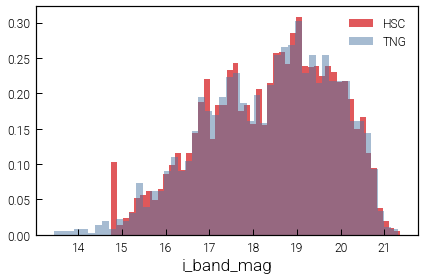

In [211]:
bins = 50
plt.hist(quant1["i_cmodel_mag_ge"], density=True, label="HSC", bins=bins)
plt.hist(quant2["i_band_mag_apparent"], density=True, alpha=0.5, label="TNG", bins=bins)
plt.xlabel("i_band_mag")
plt.legend()